## Question 1: Occupations 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user'


users = pd.read_csv(url, sep='|')


print(users.head())

   user_id  age gender  occupation zip_code
0        1   24      M  technician    85711
1        2   53      F       other    94043
2        3   23      M      writer    32067
3        4   24      M  technician    43537
4        5   33      F       other    15213


In [4]:
mean_age_per_occupation = users.groupby('occupation')['age'].mean().reset_index()


mean_age_per_occupation.columns = ['Occupation', 'Mean Age']


print("Mean Age per Occupation:")
print(mean_age_per_occupation)

Mean Age per Occupation:
       Occupation   Mean Age
0   administrator  38.746835
1          artist  31.392857
2          doctor  43.571429
3        educator  42.010526
4        engineer  36.388060
5   entertainment  29.222222
6       executive  38.718750
7      healthcare  41.562500
8       homemaker  32.571429
9          lawyer  36.750000
10      librarian  40.000000
11      marketing  37.615385
12           none  26.555556
13          other  34.523810
14     programmer  33.121212
15        retired  63.071429
16       salesman  35.666667
17      scientist  35.548387
18        student  22.081633
19     technician  33.148148
20         writer  36.311111


In [5]:
total_counts = users.groupby('occupation')['gender'].count().reset_index(name='Total')


male_counts = users[users['gender'] == 'M'].groupby('occupation')['gender'].count().reset_index(name='Male')


male_ratio = pd.merge(total_counts, male_counts, on='occupation')


male_ratio['Male Ratio'] = male_ratio['Male'] / male_ratio['Total']

male_ratio_sorted = male_ratio.sort_values(by='Male Ratio', ascending=False)


print("Male Ratio per Occupation (Sorted from Most to Least):")
print(male_ratio_sorted[['occupation', 'Male Ratio']])

Male Ratio per Occupation (Sorted from Most to Least):
       occupation  Male Ratio
2          doctor    1.000000
4        engineer    0.970149
19     technician    0.962963
15        retired    0.928571
14     programmer    0.909091
6       executive    0.906250
17      scientist    0.903226
5   entertainment    0.888889
9          lawyer    0.833333
16       salesman    0.750000
3        educator    0.726316
18        student    0.693878
13          other    0.657143
11      marketing    0.615385
20         writer    0.577778
12           none    0.555556
0   administrator    0.544304
1          artist    0.535714
10      librarian    0.431373
7      healthcare    0.312500
8       homemaker    0.142857


In [6]:
male_ratio_alt = users.groupby('occupation').agg(
    Total=('gender', 'count'),
    Male=('gender', lambda x: (x == 'M').sum())
).reset_index()


male_ratio_alt['Male Ratio'] = male_ratio_alt['Male'] / male_ratio_alt['Total']


male_ratio_alt_sorted = male_ratio_alt.sort_values(by='Male Ratio', ascending=False)

print("Male Ratio per Occupation (Sorted from Most to Least) - Alternative Approach:")
print(male_ratio_alt_sorted[['occupation', 'Male Ratio']])

Male Ratio per Occupation (Sorted from Most to Least) - Alternative Approach:
       occupation  Male Ratio
2          doctor    1.000000
4        engineer    0.970149
19     technician    0.962963
15        retired    0.928571
14     programmer    0.909091
6       executive    0.906250
17      scientist    0.903226
5   entertainment    0.888889
9          lawyer    0.833333
16       salesman    0.750000
3        educator    0.726316
18        student    0.693878
13          other    0.657143
11      marketing    0.615385
20         writer    0.577778
12           none    0.555556
0   administrator    0.544304
1          artist    0.535714
10      librarian    0.431373
7      healthcare    0.312500
8       homemaker    0.142857


In [7]:
age_min_max = users.groupby('occupation')['age'].agg(['min', 'max']).reset_index()

age_min_max.columns = ['Occupation', 'Minimum Age', 'Maximum Age']

print("Minimum and Maximum Ages per Occupation:")
print(age_min_max)

Minimum and Maximum Ages per Occupation:
       Occupation  Minimum Age  Maximum Age
0   administrator           21           70
1          artist           19           48
2          doctor           28           64
3        educator           23           63
4        engineer           22           70
5   entertainment           15           50
6       executive           22           69
7      healthcare           22           62
8       homemaker           20           50
9          lawyer           21           53
10      librarian           23           69
11      marketing           24           55
12           none           11           55
13          other           13           64
14     programmer           20           63
15        retired           51           73
16       salesman           18           66
17      scientist           23           55
18        student            7           42
19     technician           21           55
20         writer           18     

In [8]:
mean_age_occupation_gender = users.groupby(['occupation', 'gender'])['age'].mean().reset_index()


mean_age_occupation_gender.columns = ['Occupation', 'Gender', 'Mean Age']

print("Mean Age per Occupation and Gender:")
print(mean_age_occupation_gender)

Mean Age per Occupation and Gender:
       Occupation Gender   Mean Age
0   administrator      F  40.638889
1   administrator      M  37.162791
2          artist      F  30.307692
3          artist      M  32.333333
4          doctor      M  43.571429
5        educator      F  39.115385
6        educator      M  43.101449
7        engineer      F  29.500000
8        engineer      M  36.600000
9   entertainment      F  31.000000
10  entertainment      M  29.000000
11      executive      F  44.000000
12      executive      M  38.172414
13     healthcare      F  39.818182
14     healthcare      M  45.400000
15      homemaker      F  34.166667
16      homemaker      M  23.000000
17         lawyer      F  39.500000
18         lawyer      M  36.200000
19      librarian      F  40.000000
20      librarian      M  40.000000
21      marketing      F  37.200000
22      marketing      M  37.875000
23           none      F  36.500000
24           none      M  18.600000
25          other      F  35

In [9]:
counts = users.groupby(['occupation', 'gender']).size().reset_index(name='Count')

total = users.groupby('occupation').size().reset_index(name='Total')

percentage = pd.merge(counts, total, on='occupation')

percentage['Percentage'] = (percentage['Count'] / percentage['Total']) * 100

percentage.columns = ['Occupation', 'Gender', 'Count', 'Total', 'Percentage']

print("Percentage of Women and Men per Occupation:")
print(percentage[['Occupation', 'Gender', 'Percentage']])

Percentage of Women and Men per Occupation:
       Occupation Gender  Percentage
0   administrator      F   45.569620
1   administrator      M   54.430380
2          artist      F   46.428571
3          artist      M   53.571429
4          doctor      M  100.000000
5        educator      F   27.368421
6        educator      M   72.631579
7        engineer      F    2.985075
8        engineer      M   97.014925
9   entertainment      F   11.111111
10  entertainment      M   88.888889
11      executive      F    9.375000
12      executive      M   90.625000
13     healthcare      F   68.750000
14     healthcare      M   31.250000
15      homemaker      F   85.714286
16      homemaker      M   14.285714
17         lawyer      F   16.666667
18         lawyer      M   83.333333
19      librarian      F   56.862745
20      librarian      M   43.137255
21      marketing      F   38.461538
22      marketing      M   61.538462
23           none      F   44.444444
24           none      M   55.5

In [10]:
pivot_counts = users.pivot_table(index='occupation', columns='gender', aggfunc='size', fill_value=0)

pivot_percentage = pivot_counts.div(pivot_counts.sum(axis=1), axis=0) * 100


pivot_percentage.columns = ['Female (%)', 'Male (%)']


print("Percentage of Women and Men per Occupation (Pivot Table):")
print(pivot_percentage)

Percentage of Women and Men per Occupation (Pivot Table):
               Female (%)    Male (%)
occupation                           
administrator   45.569620   54.430380
artist          46.428571   53.571429
doctor           0.000000  100.000000
educator        27.368421   72.631579
engineer         2.985075   97.014925
entertainment   11.111111   88.888889
executive        9.375000   90.625000
healthcare      68.750000   31.250000
homemaker       85.714286   14.285714
lawyer          16.666667   83.333333
librarian       56.862745   43.137255
marketing       38.461538   61.538462
none            44.444444   55.555556
other           34.285714   65.714286
programmer       9.090909   90.909091
retired          7.142857   92.857143
salesman        25.000000   75.000000
scientist        9.677419   90.322581
student         30.612245   69.387755
technician       3.703704   96.296296
writer          42.222222   57.777778


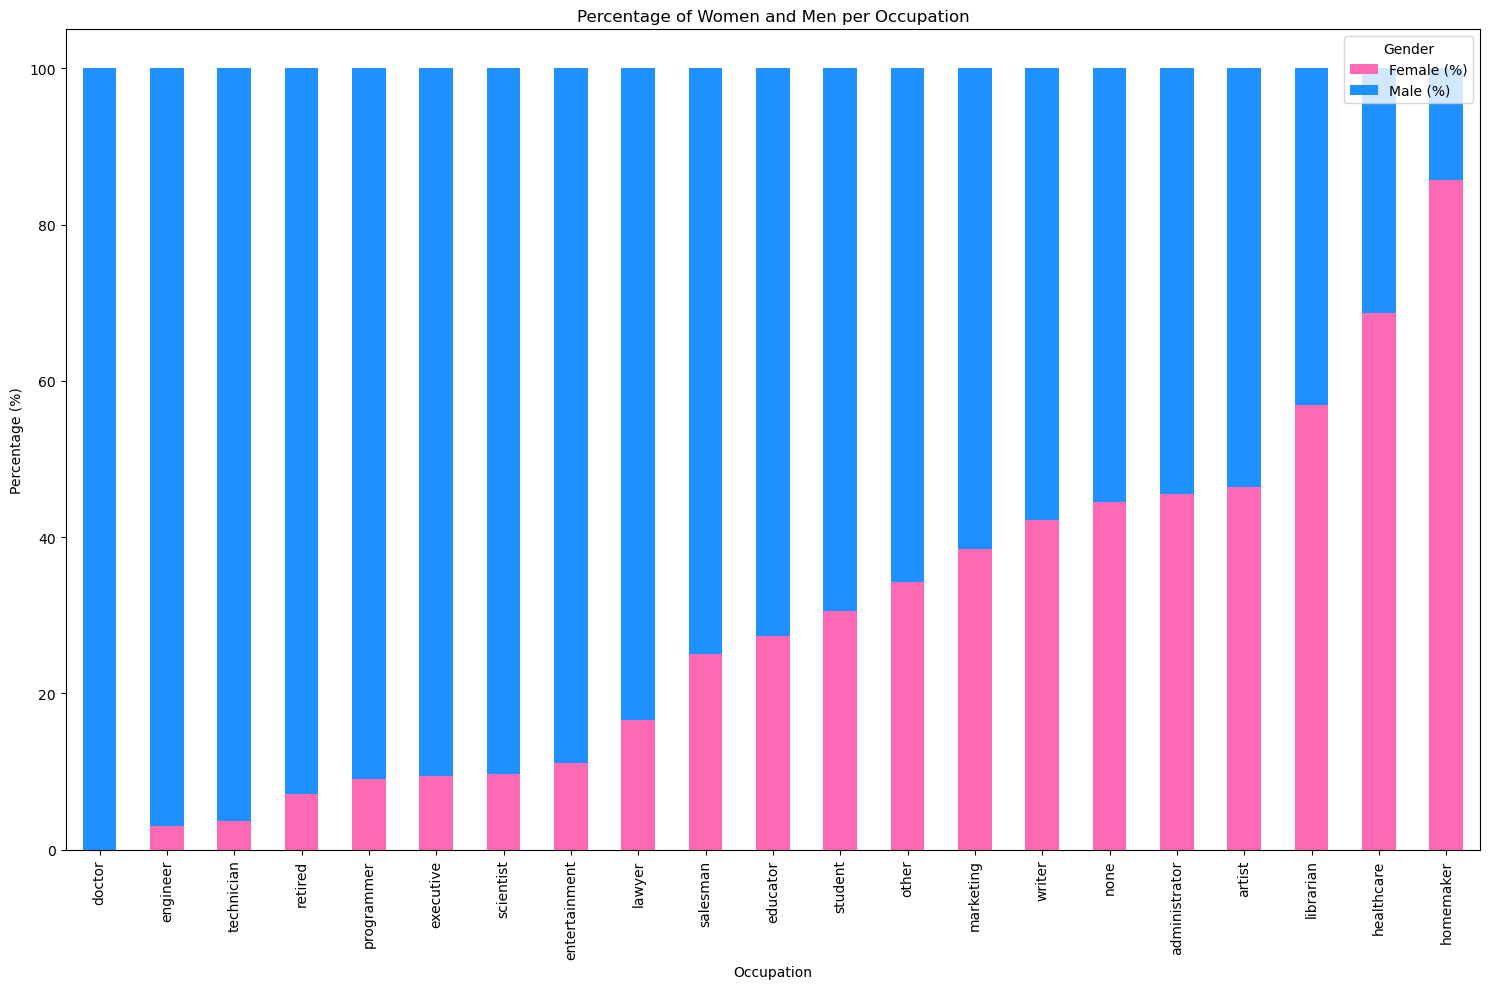

In [11]:
pivot_percentage = users.pivot_table(index='occupation', columns='gender', aggfunc='size', fill_value=0)
pivot_percentage = pivot_percentage.div(pivot_percentage.sum(axis=1), axis=0) * 100


pivot_percentage.columns = ['Female (%)', 'Male (%)']
pivot_percentage = pivot_percentage.sort_values(by='Male (%)', ascending=False)

pivot_percentage.plot(kind='bar', stacked=True, figsize=(15, 10), color=['#FF69B4', '#1E90FF'])

plt.ylabel('Percentage (%)')
plt.xlabel('Occupation')
plt.title('Percentage of Women and Men per Occupation')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

## Question 2: Euro Teams

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
url = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv'

euro12 = pd.read_csv(url)
print(euro12.head())

             Team  Goals  Shots on target  Shots off target Shooting Accuracy  \
0         Croatia      4               13                12             51.9%   
1  Czech Republic      4               13                18             41.9%   
2         Denmark      4               10                10             50.0%   
3         England      5               11                18             50.0%   
4          France      3               22                24             37.9%   

  % Goals-to-shots  Total shots (inc. Blocked)  Hit Woodwork  Penalty goals  \
0            16.0%                          32             0              0   
1            12.9%                          39             0              0   
2            20.0%                          27             1              0   
3            17.2%                          40             0              0   
4             6.5%                          65             1              0   

   Penalties not scored  ...  Saves ma

In [15]:
goals = euro12[['Goals']]

print(goals.head())

   Goals
0      4
1      4
2      4
3      5
4      3


In [16]:
num_teams = euro12['Team'].nunique()

print(f"Number of teams participated in Euro2012: {num_teams}")

Number of teams participated in Euro2012: 16


In [17]:
num_columns = euro12.shape[1]

print(f"Number of columns in the dataset: {num_columns}")

Number of columns in the dataset: 35


In [18]:
discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]

print(discipline.head())

             Team  Yellow Cards  Red Cards
0         Croatia             9          0
1  Czech Republic             7          0
2         Denmark             4          0
3         England             5          0
4          France             6          0


In [19]:
discipline_sorted = discipline.sort_values(by=['Red Cards', 'Yellow Cards'], ascending=[False, False])

discipline_sorted.reset_index(drop=True, inplace=True)

print("Teams sorted by Red Cards and then by Yellow Cards:")
print(discipline_sorted)

Teams sorted by Red Cards and then by Yellow Cards:
                   Team  Yellow Cards  Red Cards
0                Greece             9          1
1                Poland             7          1
2   Republic of Ireland             6          1
3                 Italy            16          0
4              Portugal            12          0
5                 Spain            11          0
6               Croatia             9          0
7        Czech Republic             7          0
8                Sweden             7          0
9                France             6          0
10               Russia             6          0
11              England             5          0
12          Netherlands             5          0
13              Ukraine             5          0
14              Denmark             4          0
15              Germany             4          0


In [20]:
mean_yellow_cards = euro12.groupby('Team')['Yellow Cards'].mean().reset_index()

mean_yellow_cards.columns = ['Team', 'Mean Yellow Cards']

print("Mean Yellow Cards per Team:")
print(mean_yellow_cards)

Mean Yellow Cards per Team:
                   Team  Mean Yellow Cards
0               Croatia                9.0
1        Czech Republic                7.0
2               Denmark                4.0
3               England                5.0
4                France                6.0
5               Germany                4.0
6                Greece                9.0
7                 Italy               16.0
8           Netherlands                5.0
9                Poland                7.0
10             Portugal               12.0
11  Republic of Ireland                6.0
12               Russia                6.0
13                Spain               11.0
14               Sweden                7.0
15              Ukraine                5.0


In [21]:
teams_over_6_goals = euro12[euro12['Goals'] > 6]
print("Teams that scored more than 6 goals:")
print(teams_over_6_goals[['Team', 'Goals']])

Teams that scored more than 6 goals:
       Team  Goals
5   Germany     10
13    Spain     12


In [22]:
teams_over_6_goals = euro12[euro12['Goals'] > 6]

print("Teams that scored more than 6 goals:")
print(teams_over_6_goals[['Team', 'Goals']])

Teams that scored more than 6 goals:
       Team  Goals
5   Germany     10
13    Spain     12


In [23]:
teams_over_6_goals = euro12[euro12['Goals'] > 6]

print("Teams that scored more than 6 goals:")
print(teams_over_6_goals[['Team', 'Goals']])

Teams that scored more than 6 goals:
       Team  Goals
5   Germany     10
13    Spain     12


In [24]:
teams_starting_with_G = euro12[euro12['Team'].str.startswith('G')]


print("Teams that start with 'G':")
print(teams_starting_with_G[['Team', 'Goals']])

Teams that start with 'G':
      Team  Goals
5  Germany     10
6   Greece      5


In [25]:
print(f"Number of columns in euro12 dataset: {euro12.shape[1]}")

first_7_columns = euro12.iloc[:, :7]

print("First 7 columns:")
print(first_7_columns.head())

Number of columns in euro12 dataset: 35
First 7 columns:
             Team  Goals  Shots on target  Shots off target Shooting Accuracy  \
0         Croatia      4               13                12             51.9%   
1  Czech Republic      4               13                18             41.9%   
2         Denmark      4               10                10             50.0%   
3         England      5               11                18             50.0%   
4          France      3               22                24             37.9%   

  % Goals-to-shots  Total shots (inc. Blocked)  
0            16.0%                          32  
1            12.9%                          39  
2            20.0%                          27  
3            17.2%                          40  
4             6.5%                          65  


In [26]:
columns_except_last_3 = euro12.iloc[:, :-3]

print("All columns except the last 3:")
print(columns_except_last_3.head())

All columns except the last 3:
             Team  Goals  Shots on target  Shots off target Shooting Accuracy  \
0         Croatia      4               13                12             51.9%   
1  Czech Republic      4               13                18             41.9%   
2         Denmark      4               10                10             50.0%   
3         England      5               11                18             50.0%   
4          France      3               22                24             37.9%   

  % Goals-to-shots  Total shots (inc. Blocked)  Hit Woodwork  Penalty goals  \
0            16.0%                          32             0              0   
1            12.9%                          39             0              0   
2            20.0%                          27             1              0   
3            17.2%                          40             0              0   
4             6.5%                          65             1              0   

   Pena

In [27]:
teams_of_interest = ['England', 'Italy', 'Russia']

shooting_accuracy = euro12[euro12['Team'].isin(teams_of_interest)][['Team', 'Shooting Accuracy']]
print("Shooting Accuracy for England, Italy, and Russia:")
print(shooting_accuracy)

Shooting Accuracy for England, Italy, and Russia:
       Team Shooting Accuracy
3   England             50.0%
7     Italy             43.0%
12   Russia             22.5%


## Question 3: Housing

In [29]:
import pandas as pd
import numpy as np

In [30]:
np.random.seed(0)

bedrooms = pd.Series(np.random.randint(1, 5, size=100))
bathrooms = pd.Series(np.random.randint(1, 4, size=100))
price_sqr_meter = pd.Series(np.random.randint(10000, 30001, size=100))

print("Bedrooms:\n", bedrooms.head())
print("\nBathrooms:\n", bathrooms.head())
print("\nPrice per Square Meter:\n", price_sqr_meter.head())

Bedrooms:
 0    1
1    4
2    2
3    1
4    4
dtype: int64

Bathrooms:
 0    2
1    3
2    1
3    1
4    3
dtype: int64

Price per Square Meter:
 0    15021
1    11134
2    26409
3    19680
4    27340
dtype: int64


In [31]:
housing_df = pd.concat([bedrooms, bathrooms, price_sqr_meter], axis=1)

print("Housing DataFrame:")
print(housing_df.head())

Housing DataFrame:
   0  1      2
0  1  2  15021
1  4  3  11134
2  2  1  26409
3  1  1  19680
4  4  3  27340


In [32]:
housing_df.columns = ['bedrs', 'bathrs', 'price_sqr_meter']

print("Renamed Housing DataFrame:")
print(housing_df.head())

Renamed Housing DataFrame:
   bedrs  bathrs  price_sqr_meter
0      1       2            15021
1      4       3            11134
2      2       1            26409
3      1       1            19680
4      4       3            27340


In [33]:
bigcolumn = pd.DataFrame(pd.concat([bedrooms, bathrooms, price_sqr_meter], ignore_index=True), columns=['bigcolumn'])


print("Big Column DataFrame:")
print(bigcolumn.head())

Big Column DataFrame:
   bigcolumn
0          1
1          4
2          2
3          1
4          4


In [34]:
max_index = housing_df.index.max()

print(f"Maximum index in housing_df: {max_index}")

Maximum index in housing_df: 99


In [35]:
housing_df_reindexed = housing_df.reindex(range(300))

housing_df_reindexed.reset_index(drop=True, inplace=True)
print(f"New DataFrame shape: {housing_df_reindexed.shape}")
print("Last few rows of reindexed Housing DataFrame:")
print(housing_df_reindexed.tail())

New DataFrame shape: (300, 3)
Last few rows of reindexed Housing DataFrame:
     bedrs  bathrs  price_sqr_meter
295    NaN     NaN              NaN
296    NaN     NaN              NaN
297    NaN     NaN              NaN
298    NaN     NaN              NaN
299    NaN     NaN              NaN


In [36]:
housing_df_extended = pd.concat([housing_df]*3, ignore_index=True)
housing_df_reindexed = housing_df_extended.copy()
print(f"New DataFrame shape after concatenation: {housing_df_reindexed.shape}")
print("First few rows of extended Housing DataFrame:")
print(housing_df_reindexed.head())
print("Last few rows of extended Housing DataFrame:")
print(housing_df_reindexed.tail())

New DataFrame shape after concatenation: (300, 3)
First few rows of extended Housing DataFrame:
   bedrs  bathrs  price_sqr_meter
0      1       2            15021
1      4       3            11134
2      2       1            26409
3      1       1            19680
4      4       3            27340
Last few rows of extended Housing DataFrame:
     bedrs  bathrs  price_sqr_meter
295      1       2            28161
296      3       2            29745
297      4       1            18338
298      2       1            24676
299      1       1            12562


**Question 4: Wind Statistics**

In [38]:
import pandas as pd
import numpy as np
data = pd.DataFrame({
    'Yr': [61, 61, 61],
    'Mo': [1, 1, 1],
    'Dy': [1, 2, 3],
    'RPT': [15.04, 14.71, 18.50],
    'VAL': [14.96, np.nan, 16.88],
    'ROS': [13.17, 10.83, 12.33],
    'KIL': [9.29, 6.50, 10.13],
    'SHA': [np.nan, 12.62, 11.17],
    'BIR': [9.87, 7.67, 6.17],
    'DUB': [13.67, 11.50, 11.25],
    'CLA': [10.25, 10.04, np.nan],
    'MUL': [10.83, 9.67, 8.50],
    'CLO': [12.58, 17.54, 7.67],
    'BEL': [18.50, 13.83, 12.75],
    'MAL': [15.04, 13.83, 12.71]
})
def convert_two_digit_year(year):
    if year >= 70:
        return 1900 + year
    else:
        return 2000 + year


data.rename(columns={'Yr': 'Yr', 'Mo': 'Mo', 'Dy': 'Dy'}, inplace=True) 
data['year'] = data['Yr'].apply(convert_two_digit_year)
data.rename(columns={'Mo': 'month', 'Dy': 'day'}, inplace=True)
missing_dates = data[['year', 'month', 'day']].isna().sum()
print("Missing values in date columns:")
print(missing_dates)

data['Date'] = pd.to_datetime(data[['year', 'month', 'day']], errors='coerce')

print("\nDataFrame with 'Date' column:")
print(data)
print("\nData type of index before setting:")
print(data['Date'].dtype)
data.set_index('Date', inplace=True)

data.drop(['year', 'month', 'day'], axis=1, inplace=True)

print("\nFinal DataFrame with 'Date' as index:")
print(data)
print("\nData type of index:", data.index.dtype)

Missing values in date columns:
year     0
month    0
day      0
dtype: int64

DataFrame with 'Date' column:
   Yr  month  day    RPT    VAL    ROS    KIL    SHA   BIR    DUB    CLA  \
0  61      1    1  15.04  14.96  13.17   9.29    NaN  9.87  13.67  10.25   
1  61      1    2  14.71    NaN  10.83   6.50  12.62  7.67  11.50  10.04   
2  61      1    3  18.50  16.88  12.33  10.13  11.17  6.17  11.25    NaN   

     MUL    CLO    BEL    MAL  year       Date  
0  10.83  12.58  18.50  15.04  2061 2061-01-01  
1   9.67  17.54  13.83  13.83  2061 2061-01-02  
2   8.50   7.67  12.75  12.71  2061 2061-01-03  

Data type of index before setting:
datetime64[ns]

Final DataFrame with 'Date' as index:
            Yr    RPT    VAL    ROS    KIL    SHA   BIR    DUB    CLA    MUL  \
Date                                                                           
2061-01-01  61  15.04  14.96  13.17   9.29    NaN  9.87  13.67  10.25  10.83   
2061-01-02  61  14.71    NaN  10.83   6.50  12.62  7.67  11.

In [39]:

num_nat = data.index.isna().sum()
print(f"\nNumber of NaT values in the 'Date' index: {num_nat}")


Number of NaT values in the 'Date' index: 0


## Question 5: Chipotle Orders Analysis (chipo)

In [41]:
import pandas as pd
import numpy as np

In [42]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
chipo = pd.read_csv(url, sep='\t')
print(chipo.head())

   order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   

                                  choice_description item_price  
0                                                NaN     $2.39   
1                                       [Clementine]     $3.39   
2                                            [Apple]     $3.39   
3                                                NaN     $2.39   
4  [Tomatillo-Red Chili Salsa (Hot), [Black Beans...    $16.98   


In [43]:
print("First 10 entries in the dataset:")
print(chipo.head(10))

First 10 entries in the dataset:
   order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   
5         3         1                           Chicken Bowl   
6         3         1                          Side of Chips   
7         4         1                          Steak Burrito   
8         4         1                       Steak Soft Tacos   
9         5         1                          Steak Burrito   

                                  choice_description item_price  
0                                                NaN     $2.39   
1                                       [Clementine]     $3.39   
2                                            [Apple]     $3.39  

In [44]:
num_observations = chipo.shape[0]

print(f"Number of observations in the dataset: {num_observations}")

Number of observations in the dataset: 4622


In [45]:
num_columns = chipo.shape[1]

print(f"Number of columns in the dataset: {num_columns}")

Number of columns in the dataset: 5


In [46]:
column_names = chipo.columns.tolist()

print("Column names in the dataset:")
print(column_names)

Column names in the dataset:
['order_id', 'quantity', 'item_name', 'choice_description', 'item_price']


In [47]:
print("Index of the dataset:")
print(chipo.index)

Index of the dataset:
RangeIndex(start=0, stop=4622, step=1)


In [48]:
total_quantity = chipo.groupby('item_name')['quantity'].sum().reset_index()

most_ordered_item = total_quantity.sort_values(by='quantity', ascending=False).iloc[0]

print(f"Most-ordered item: {most_ordered_item['item_name']} with {most_ordered_item['quantity']} orders.")

Most-ordered item: Chicken Bowl with 761 orders.


In [49]:
print(f"Total number of '{most_ordered_item['item_name']}' ordered: {most_ordered_item['quantity']}")

Total number of 'Chicken Bowl' ordered: 761


In [50]:
most_ordered_choice = chipo['choice_description'].dropna().mode()

if not most_ordered_choice.empty:
    most_ordered_choice = most_ordered_choice.iloc[0]
    print(f"Most ordered choice_description: {most_ordered_choice}")
else:
    print("No choice_description data available.")

Most ordered choice_description: [Diet Coke]


In [51]:
total_items_ordered = chipo['quantity'].sum()

print(f"Total number of items ordered: {total_items_ordered}")

Total number of items ordered: 4972


In [52]:
chipo['item_price'] = chipo['item_price'].replace('[\$,]', '', regex=True).astype(float)


print("DataFrame with 'item_price' as float:")
print(chipo.head())

DataFrame with 'item_price' as float:
   order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   

                                  choice_description  item_price  
0                                                NaN        2.39  
1                                       [Clementine]        3.39  
2                                            [Apple]        3.39  
3                                                NaN        2.39  
4  [Tomatillo-Red Chili Salsa (Hot), [Black Beans...       16.98  


<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
/var/folders/hc/qfqypj051tq23645x2x7nytw0000gp/T/ipykernel_4030/2231444828.py:2: SyntaxWarning: invalid escape sequence '\$'
  chipo['item_price'] = chipo['item_price'].replace('[\$,]', '', regex=True).astype(float)


In [53]:
print("Data type of 'item_price':", chipo['item_price'].dtype)

Data type of 'item_price': float64


In [54]:
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x) if isinstance(x, str) else x)


print("Data type of 'item_price' after lambda function:", chipo['item_price'].dtype)

Data type of 'item_price' after lambda function: float64


In [55]:
chipo['revenue'] = chipo['quantity'] * chipo['item_price']
total_revenue = chipo['revenue'].sum()

print(f"Total revenue for the period: ${total_revenue:.2f}")

Total revenue for the period: $39237.02


In [56]:
num_orders = chipo['order_id'].nunique()

print(f"Number of orders made in the period: {num_orders}")

Number of orders made in the period: 1834


In [57]:
average_revenue_per_order = total_revenue / num_orders

print(f"Average revenue per order: ${average_revenue_per_order:.2f}")

Average revenue per order: $21.39


In [58]:
num_unique_items = chipo['item_name'].nunique()

print(f"Number of different items sold: {num_unique_items}")

Number of different items sold: 50


## Question 6: Create a Line Plot Showing the Number of Marriages and Divorces per Capita in the U.S. Between 1867 and 2014

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
years = range(1867, 2015)
np.random.seed(0)
marriages = np.random.randint(500, 2000, size=len(years))
divorces = np.random.randint(200, 1000, size=len(years))


marriage_divorce_df = pd.DataFrame({
    'Year': years,
    'Marriages_per_Capita': marriages,
    'Divorces_per_Capita': divorces
})

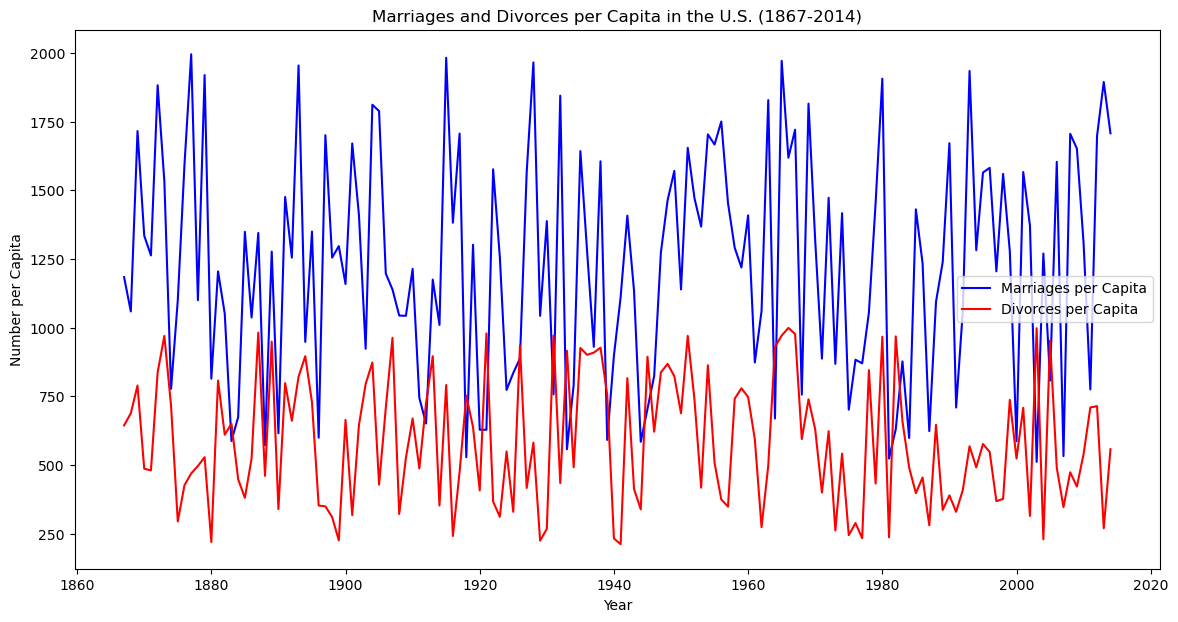

In [62]:
plt.figure(figsize=(14, 7))

plt.plot(marriage_divorce_df['Year'], marriage_divorce_df['Marriages_per_Capita'], label='Marriages per Capita', color='blue')
plt.plot(marriage_divorce_df['Year'], marriage_divorce_df['Divorces_per_Capita'], label='Divorces per Capita', color='red')
plt.xlabel('Year')
plt.ylabel('Number per Capita')
plt.title('Marriages and Divorces per Capita in the U.S. (1867-2014)')

plt.legend()
plt.show()

## Question 7: Create a Vertical Bar Chart Comparing the Number of Marriages and Divorces per Capita in the U.S. Between 1900, 1950, and 2000

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [65]:

selected_years = [1900, 1950, 2000]

selected_data = marriage_divorce_df[marriage_divorce_df['Year'].isin(selected_years)]

selected_data.set_index('Year', inplace=True)

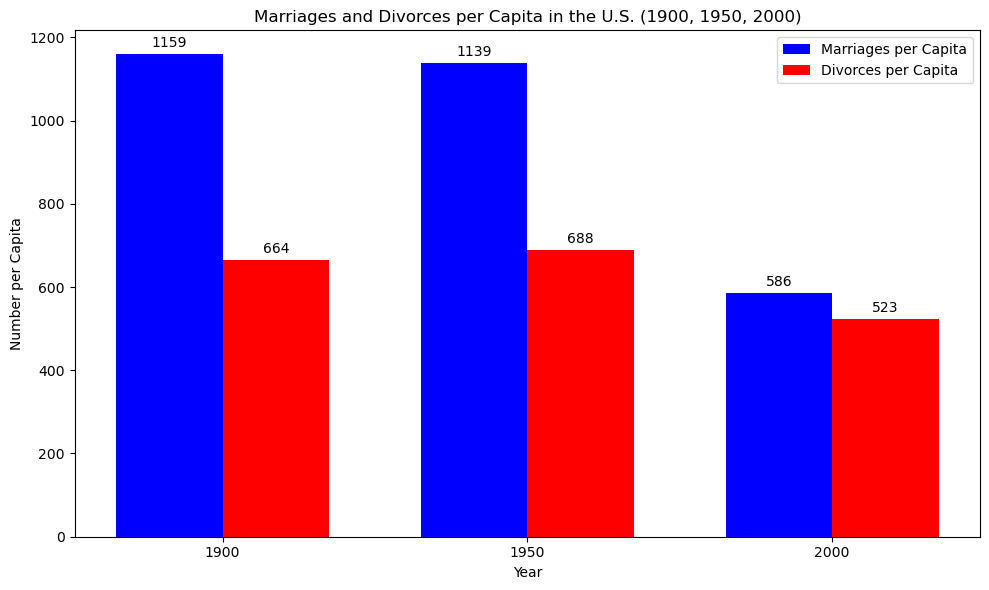

In [66]:
x = np.arange(len(selected_years))  # [0, 1, 2]
width = 0.35
fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, selected_data['Marriages_per_Capita'], width, label='Marriages per Capita', color='blue')
bars2 = ax.bar(x + width/2, selected_data['Divorces_per_Capita'], width, label='Divorces per Capita', color='red')
ax.set_xlabel('Year')
ax.set_ylabel('Number per Capita')
ax.set_title('Marriages and Divorces per Capita in the U.S. (1900, 1950, 2000)')
ax.set_xticks(x)
ax.set_xticklabels(selected_years)
ax.legend()
def annotate_bars(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

annotate_bars(bars1)
annotate_bars(bars2)


plt.tight_layout()
plt.show()

## Question 8: Create a Horizontal Bar Chart That Compares the Deadliest Actors in Hollywood

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
actors = ['Actor A', 'Actor B', 'Actor C', 'Actor D', 'Actor E']
kill_counts = [150, 300, 250, 400, 100]

actors_df = pd.DataFrame({
    'Actor': actors,
    'Kill_Count': kill_counts
})
actors_df_sorted = actors_df.sort_values(by='Kill_Count', ascending=True)
print(actors_df_sorted)

     Actor  Kill_Count
4  Actor E         100
0  Actor A         150
2  Actor C         250
1  Actor B         300
3  Actor D         400


/var/folders/hc/qfqypj051tq23645x2x7nytw0000gp/T/ipykernel_4030/1529075037.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Kill_Count', y='Actor', data=actors_df_sorted, palette='viridis')


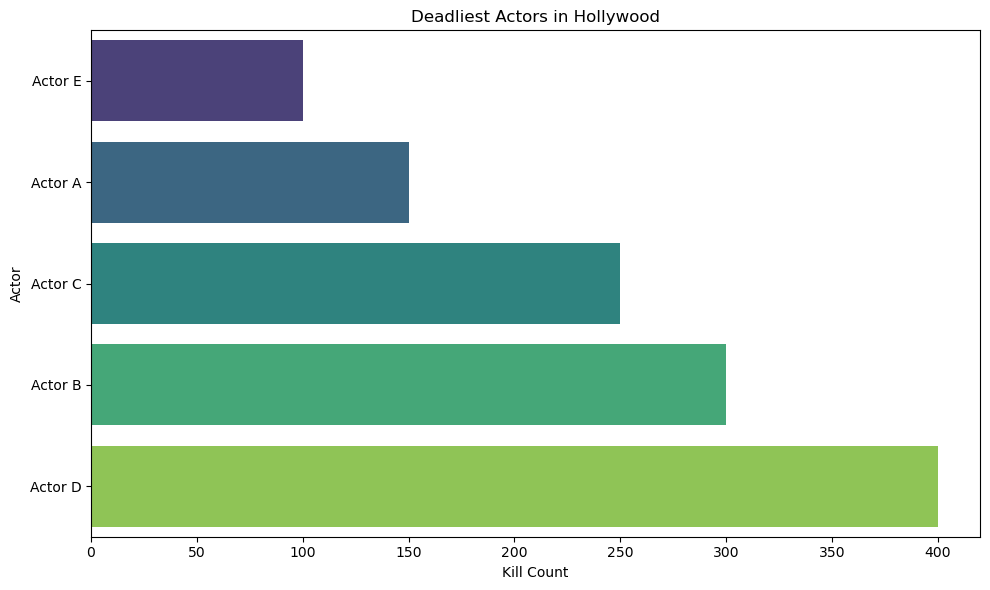

In [70]:
plt.figure(figsize=(10, 6))

sns.barplot(x='Kill_Count', y='Actor', data=actors_df_sorted, palette='viridis')

plt.xlabel('Kill Count')
plt.ylabel('Actor')
plt.title('Deadliest Actors in Hollywood')

plt.tight_layout()
plt.show()

## Question 9: Create a Pie Chart Showing the Fraction of All Roman Emperors That Were Assassinated

In [72]:
import pandas as pd
import matplotlib.pyplot as plt

In [73]:
emperors = ['Emperor A', 'Emperor B', 'Emperor C', 'Emperor D', 'Emperor E']
assassinated = [True, False, True, False, False]

emperors_df = pd.DataFrame({
    'Emperor': emperors,
    'Assassinated': assassinated
})

assassination_counts = emperors_df['Assassinated'].value_counts().rename(index={True: 'Assassinated', False: 'Not Assassinated'})
print(assassination_counts)

Assassinated
Not Assassinated    3
Assassinated        2
Name: count, dtype: int64


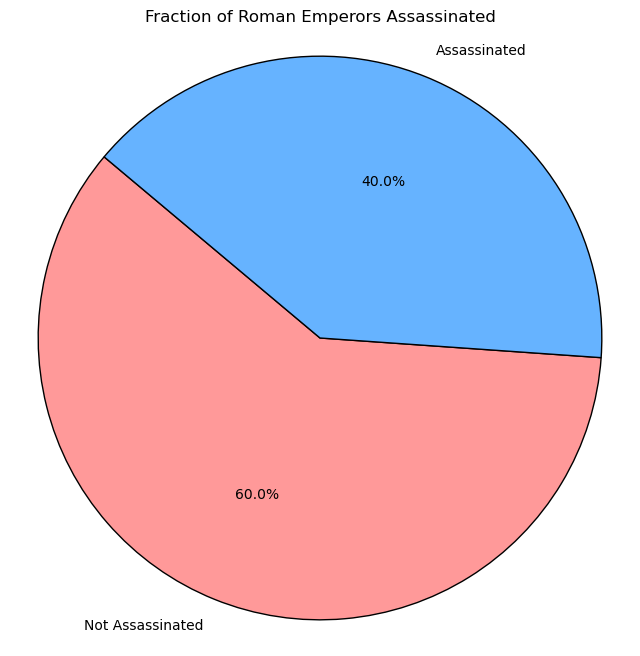

In [74]:
labels = assassination_counts.index
sizes = assassination_counts.values
colors = ['#ff9999','#66b3ff']


fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black'})


ax.axis('equal')  

plt.title('Fraction of Roman Emperors Assassinated')

plt.show()

## Question 10: Create a Scatter Plot Showing the Relationship Between the Total Revenue Earned by Arcades and the Number of Computer Science PhDs Awarded in the U.S. Between 2000 and 2009

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
years = range(2000, 2010)
np.random.seed(0)
arcade_revenue = np.random.randint(50000, 200000, size=len(years))
cs_phds = np.random.randint(100, 500, size=len(years))

arcade_cs_df = pd.DataFrame({
    'Year': years,
    'Arcade_Revenue': arcade_revenue,
    'CS_PhDs': cs_phds
})

print(arcade_cs_df)

   Year  Arcade_Revenue  CS_PhDs
0  2000           93567      414
1  2001          167952      293
2  2002          145939      139
3  2003          147639      187
4  2004           91993      274
5  2005          172579      188
6  2006          136293      437
7  2007          162420      265
8  2008           98600      125
9  2009          102620      433


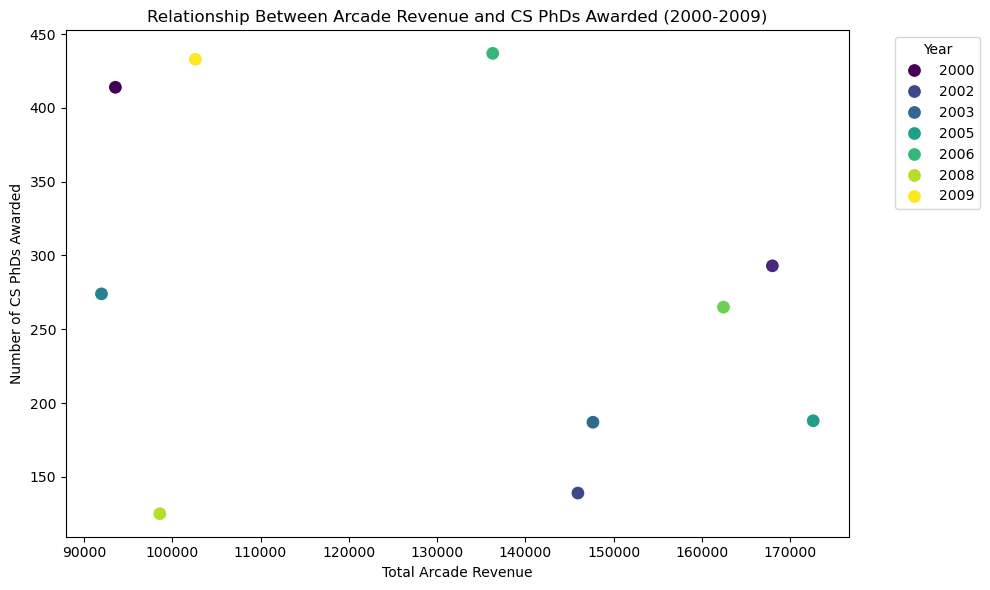

In [78]:
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(data=arcade_cs_df, x='Arcade_Revenue', y='CS_PhDs', hue='Year', palette='viridis', s=100, edgecolor='w')
plt.xlabel('Total Arcade Revenue')
plt.ylabel('Number of CS PhDs Awarded')
plt.title('Relationship Between Arcade Revenue and CS PhDs Awarded (2000-2009)')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()